In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [6]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [7]:
X=insurance_one_hot.drop("charges",axis=1) # toate coloanele EXCEPT "charges" 
y=insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [9]:
!pip install scikit-learn

In [10]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
#am dat 20 la suta ldin valori la teste cu test_siez=0.2 si 80 la train
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [11]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8945.3662 - mae: 8945.3662     
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7721.2231 - mae: 7721.2231 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7664.0703 - mae: 7664.0703 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7759.7471 - mae: 7759.7471 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7532.6470 - mae: 7532.6470 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7500.0708 - mae: 7500.0708 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7786.8984 - mae: 7786.8984 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7490.9639 - mae: 7490.9639 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7634.5371 - mae: 7634.5371 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7670.1611 - mae: 7670.1611 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7592.8677 - mae: 7592.8677 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (68.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [13]:
#Evaluate the model
model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6036.1250 - mae: 6036.1250  


[6036.125, 6036.125]

In [14]:
#Improve ou model
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13310.3809 - mae: 13310.3809   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13200.9854 - mae: 13200.9854 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12950.0215 - mae: 12950.0215 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12415.3291 - mae: 12415.3291 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11444.5977 - mae: 11444.5977 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10052.7422 - mae: 10052.7422 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8601.8945 - mae: 8601.8945 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7659.8467 - mae: 7659.8467 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7439.5190 - mae: 7439.5190 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7408.2910 - mae: 7408.2910 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7389.4072 - mae: 7389.4072 
Epoch 12/100
34/34 ━━━━━━━━

In [15]:
model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5174.8071 - mae: 5174.8071 


[5174.80712890625, 5174.80712890625]

In [16]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
history=model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13290.9141 - mae: 13290.9141   
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13129.7979 - mae: 13129.7979 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12793.2744 - mae: 12793.2744 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12121.8115 - mae: 12121.8115 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10976.9551 - mae: 10976.9551 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9505.5439 - mae: 9505.5439   
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8148.2446 - mae: 8148.2446 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7502.6470 - mae: 7502.6470 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7408.6411 - mae: 7408.6411 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7386.5273 - mae: 7386.5273 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7366.9268 - mae: 7366.9268 
Epoch 12/200
34/34 ━━━━━━━━

In [17]:
model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3408.1428 - mae: 3408.1428  


[3408.142822265625, 3408.142822265625]

Text(0.5, 0, 'epochs')

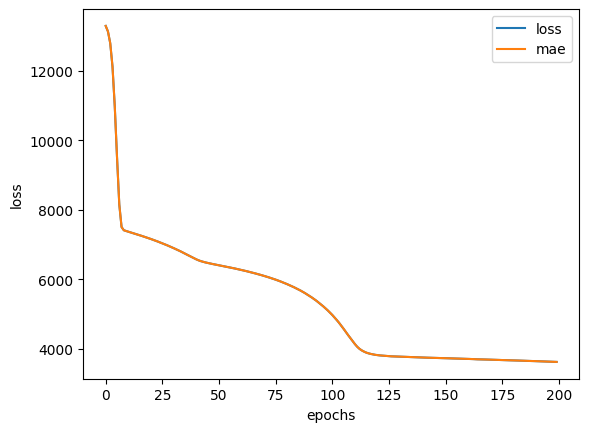

In [18]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exemplu 
### Normalizare
### MinMaxScaler pentru coloane numerice:
- Scalează valorile între **0 și 1**
- Formula: `(valoare - min) / (max - min)`
- Exemplu: `age=25` cu min=18, max=64 → `(25-18)/(64-18) = 0.15`

### OneHotEncoder pentru coloane categoriale:
- Transformă categorii în coloane binare (0 sau 1)
- Exemplu pentru "sex":
```
  sex="male"   → [1, 0]
  sex="female" → [0, 1]

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#MinMaxScaler invata: min și max pentru fiecare coloana numerica
#OneHotEncoder invata: ce categorii exista în fiecare coloană categoriala
ct=make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # get all values between 0 and 1 # Normalizare
    #valoare_normalizata = (valoare - min) / (max - min)
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)   
#De ce creem make_column_transformer? 
# separam datele pentru a vedea in fuctie de inputurile noastrea ("sex", "smoker", "region","age","bmi","children")  un cost aproximativ ar fi de "charges"
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)
#DE CE DOAR PE X_train? → Pentru a evita data leakage (scurgerea de informatii din test în train)! 
# si pentru ca nu are ce sa invete din y_train pt ca acolo avem valorile din charges

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [21]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [22]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [23]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [54]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history=insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

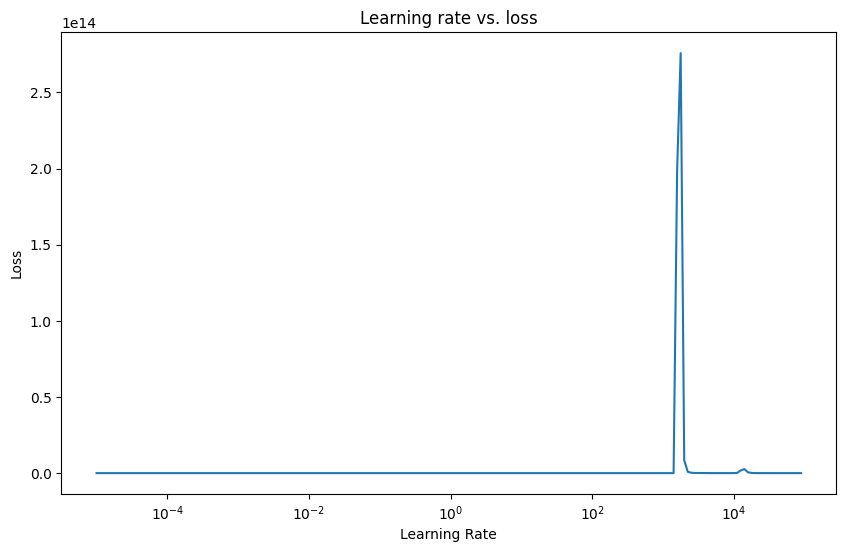

In [44]:
# Plot the learning rate versus the loss
import numpy as np
lrs = 1e-5 * (10 ** (np.arange(200)/20))
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [55]:
# Evaulate how good is our model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)
#testing the model based on unseen data 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3160.8494 - mae: 3160.8494 


In [29]:
#predicts de data
y_pred = model.predict(X_test_normal)
y_pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[-1607.4426],
       [-1969.7006],
       [ 1819.9436],
       [-1804.6144],
       [ 1351.7372],
       [-2295.9329],
       [-2065.1316],
       [-2012.4698],
       [-1907.1078],
       [-1788.6371],
       [ 1519.1736],
       [-1938.6569],
       [-1807.2239],
       [ 1911.7227],
       [ 1687.7104],
       [ 1817.169 ],
       [-1595.0033],
       [ 1918.514 ],
       [-1706.9761],
       [ 1697.1211],
       [-1929.5778],
       [-2135.5903],
       [-2479.2244],
       [-1954.1917],
       [-1580.1512],
       [-1763.2384],
       [-2039.5977],
       [-1715.8856],
       [-1596.5042],
       [-2176.4045],
       [-1744.6085],
       [-1847.8394],
       [-1959.0443],
       [-1692.7739],
       [-2335.852 ],
       [-2022.0046],
       [-2160.8447],
       [-2034.0375],
       [ 1853.4452],
       [ 1652.6067],
       [-1764.8397],
       [-2152.4055],
       [-1961.1469],
       [-2035.0851],
       [-1887.2247],
       [-2141.5134],
       [-1854.9167],
       [-1931

In [47]:
insurance_model_3_mae

62753247232.0

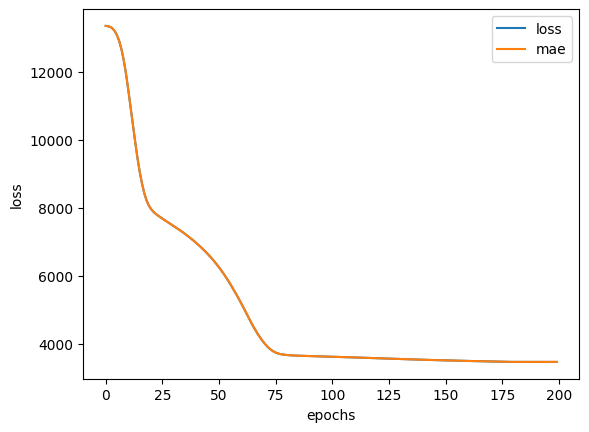

In [51]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()